In [ ]:
!pip install -q keras-ocr

In [1]:
import keras_ocr
import matplotlib.pyplot as plt

In [2]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\Dilshan Karunarathne\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Dilshan Karunarathne\.keras-ocr\crnn_kurapan.h5


In [27]:
images = [
    keras_ocr.tools.read(img) for img in ['2.jpg']
]

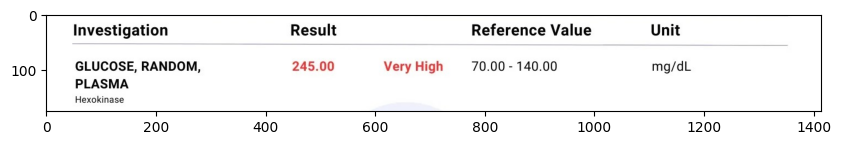

In [28]:
plt.figure(figsize = (10,20))
plt.imshow(images[0])

In [21]:
prediction_groups = pipeline.recognize(images)

6/6 [==============================] - 7s 1s/step


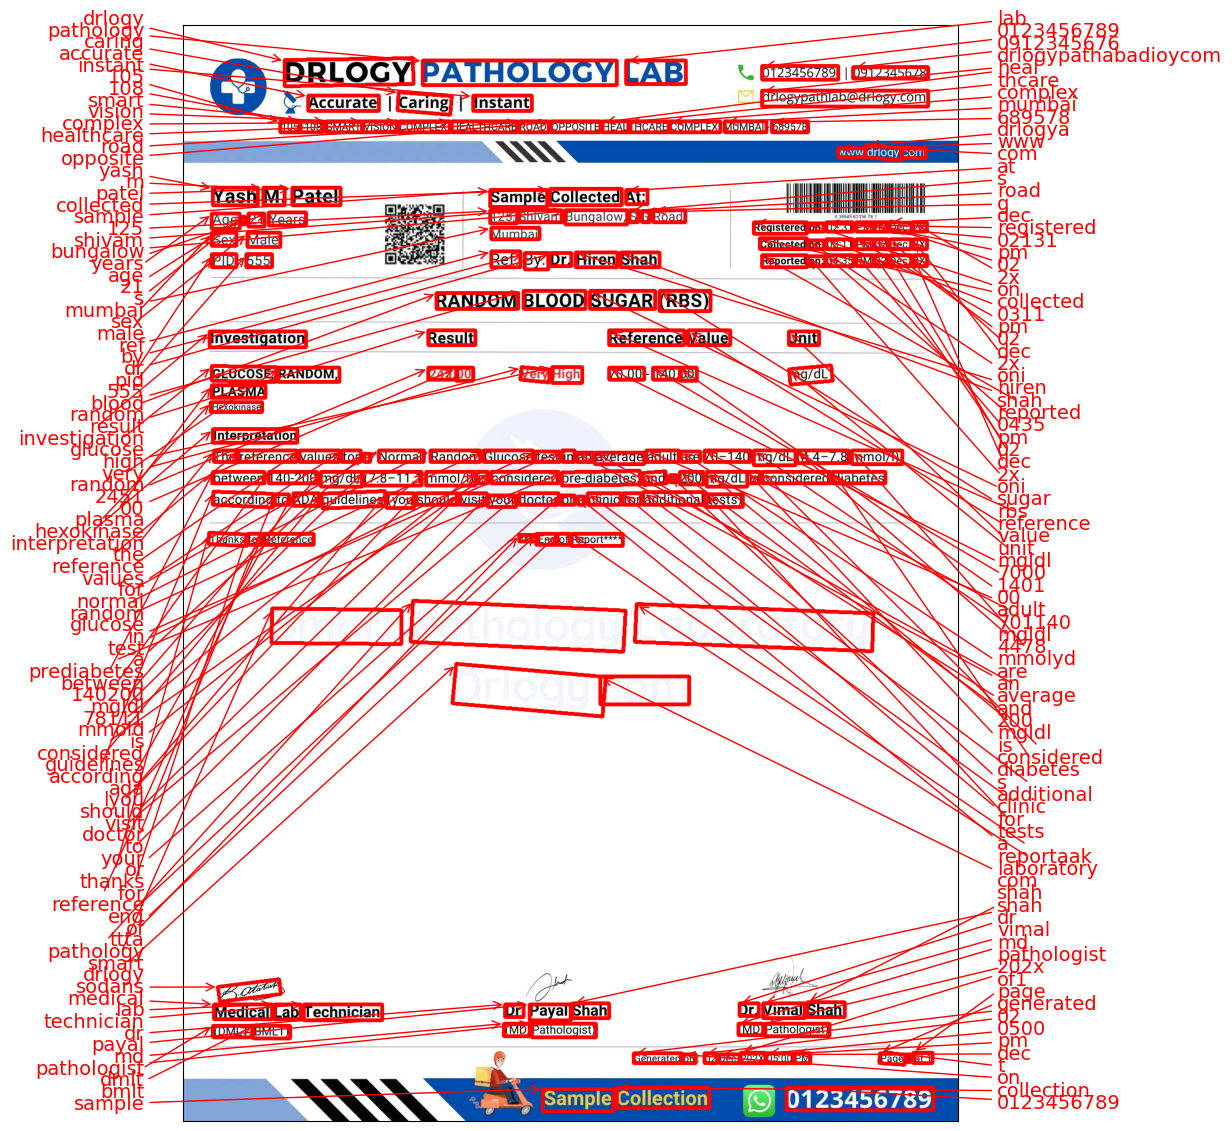

In [22]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))

# Check if axs is a list, if not, make it a list
if not isinstance(axs, list):
    axs = [axs]

for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [30]:
# prints all the words in the image
for i, predictions in enumerate(prediction_groups):
    print(f"Predictions for image {i}:\n")
    for prediction in predictions:
        print(prediction[0])
    print("\n")

Predictions for image 0:

reference
investigation
result
value
unit
glucosed
random
245
00
very
high
zo0
00
1401
00
mgildl
plasma
hexokinase



# Test 1: Recognize text 'sugar'

In [24]:
# Recognize text in the image
prediction_groups = pipeline.recognize(images)

# Iterate over the recognized text
for i, predictions in enumerate(prediction_groups):
    for word, array in predictions:
        # Check if the word is "blood glucose level"
        if "glucose" in word.lower():
            # Print the entire line
            print(' '.join([w for w, _ in predictions]))
            break

6/6 [==============================] - 7s 1s/step
drlogy pathology lab 0123456789 0912345676 drlogypathabadioycom caring accurate instant 105 108 smart vision complex healthcare road opposite heal thcare complex mumbai 689578 drlogya www com yash m patel collected sample at 125 shivam bungalow s g road years age 21 s registered 02131 pm 02 dec 2x on mumbai sex male collected 0311 pm 02 dec 2x oni ref hiren shah by dr pid 555 reported 0435 pm 02 dec 2x oni blood sugar rbs random result reference value investigation unit glucose high mgldl random 2451 00 very 7000 1401 00 plasma hexokinase interpretation the reference values for normal random glucose in adult 701140 mgldl 4478 mmolyd test are a an average between 140200 mgldl 78111 mmold is considered prediabetes and 200 mgldl is considered diabetes s additional according ada guidelines lyou should visit doctor clinic for to tests your or a thanks for reference ttta end of reportaak pathology laboratory smart drlogy com sodans shah shah 

# Test 2: Recognize text 'glucose'

In [25]:
# Recognize text in the image
prediction_groups = pipeline.recognize(images)

# Iterate over the recognized text
for i, predictions in enumerate(prediction_groups):
    # Join all the recognized words into a single string
    recognized_text = ' '.join([word for word, _ in predictions]).lower()
    # Check if the phrase "blood glucose" is in the recognized text
    if "glucose" in recognized_text:
        # Print the entire line
        print(recognized_text)
        break

6/6 [==============================] - 7s 1s/step
drlogy pathology lab 0123456789 0912345676 drlogypathabadioycom caring accurate instant 105 108 smart vision complex healthcare road opposite heal thcare complex mumbai 689578 drlogya www com yash m patel collected sample at 125 shivam bungalow s g road years age 21 s registered 02131 pm 02 dec 2x on mumbai sex male collected 0311 pm 02 dec 2x oni ref hiren shah by dr pid 555 reported 0435 pm 02 dec 2x oni blood sugar rbs random result reference value investigation unit glucose high mgldl random 2451 00 very 7000 1401 00 plasma hexokinase interpretation the reference values for normal random glucose in adult 701140 mgldl 4478 mmolyd test are a an average between 140200 mgldl 78111 mmold is considered prediabetes and 200 mgldl is considered diabetes s additional according ada guidelines lyou should visit doctor clinic for to tests your or a thanks for reference ttta end of reportaak pathology laboratory smart drlogy com sodans shah shah 

# Test 3: Recognize 

In [29]:
import re

# Recognize text in the image
prediction_groups = pipeline.recognize(images)

# Iterate over the recognized text
for i, predictions in enumerate(prediction_groups):
    # Join all the recognized words into a single string
    recognized_text = ' '.join([word for word, _ in predictions]).lower()
    # Check if the phrase "blood glucose" is in the recognized text
    if "blood" in recognized_text:
        # Find the position of the phrase "blood glucose" in the string
        start = recognized_text.find("glucose") 
        # Extract the number that follows the phrase "blood glucose"
        glucose_level = re.search(r'\d+', recognized_text[start:])
        if glucose_level:
            print("Blood Glucose Level: ", glucose_level.group())
        break

1/1 [==============================] - 1s 693ms/step
